In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('data_out_snow/snowSeason_sattel_hochstuckli.csv')
df2 = pd.read_csv('data_out_snow/snowSeason_Atzmaening.csv')
df3 = pd.read_csv('data_out_snow/snowSeason_hoch-brig.csv')
df4 = pd.read_csv('data_out_snow/snowSeason_villars-diablerets.csv')
df5 = pd.read_csv('data_out_snow/snowSeason_champex.csv')
df6 = pd.read_csv('data_out_snow/snowSeason_davos.csv')

In [3]:
pd.set_option('display.max_columns',69)

In [4]:
df1Columns= df1.columns
df2Columns= df2.columns
df3Columns= df3.columns
df4Columns= df4.columns
df5Columns= df5.columns
df6Columns= df6.columns

In [5]:
#df6.head(3)

In [6]:
dfsColumns = [df1Columns, df2Columns, df3Columns, df4Columns, df5Columns, df6Columns]

### Analysis 1: Run and visualize 68 CH2018 scenarios, and the associated  seasonal situation of six ski resorts

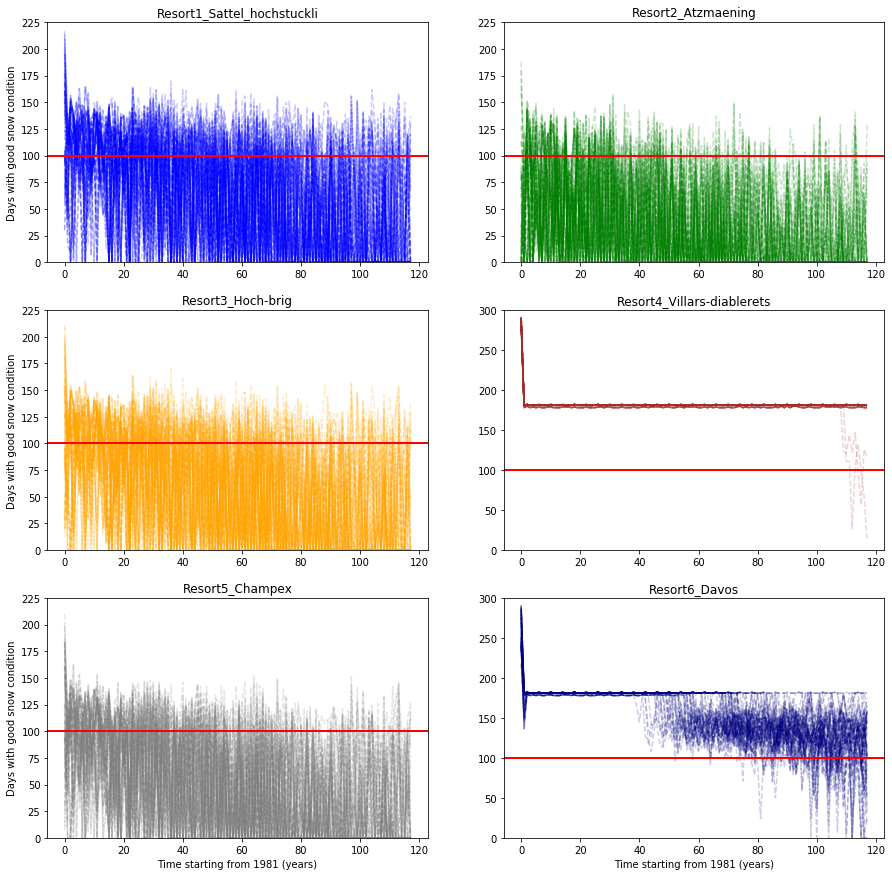

In [8]:
import matplotlib.pyplot as plt

#fig, (ax1 , ax2) = plt.subplots(1, 2)
m = 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
x_axis = np.arange(y)


def generate_plot(df, dfColumns, m, n, colorLines, BotYaxis, TopYaxis,fig_Title, fig_X_Lable, fig_Y_Lable):
    for i in range (1 , len(dfColumns), 1):
    #res1_sc1 = df[dfColumns[i]]
        axs[m,n].plot(x_axis, df[dfColumns[i]], color=colorLines, linestyle = '--', alpha=0.2)
        axs[m,n].axhline(y=100, color='r')
        axs[m,n].set_ylim(bottom=BotYaxis, top =TopYaxis)
        axs[m,n].set_title(fig_Title)
        axs[m,n].set_xlabel(fig_X_Lable)
        axs[m,n].set_ylabel(fig_Y_Lable)
        

generate_plot(df1, df1Columns,0,0,'blue',0,225, "Resort1_Sattel_hochstuckli","","Days with good snow condition")
generate_plot(df2, df2Columns,0,1,'green', 0,225, 'Resort2_Atzmaening',"","")
generate_plot(df3, df3Columns,1,0,'orange', 0,225, 'Resort3_Hoch-brig',"","Days with good snow condition")
generate_plot(df4, df4Columns,1,1,'brown', 0,300, 'Resort4_Villars-diablerets',"","")
generate_plot(df5, df5Columns,2,0,'gray', 0,225, 'Resort5_Champex',"Time starting from 1981 (years)","Days with good snow condition")
generate_plot(df6, df6Columns,2,1,'navy', 0,300, 'Resort6_Davos',"Time starting from 1981 (years)","")

plt.show()

### Analysis 2: Visualization of tipping points for 68 CH2018 scenarios in six ski resorts

In [9]:
#Making filter for databases
filt1 = df1.columns.str.contains('RCP26')
filt2 = df1.columns.str.contains('RCP45')
filt3 = df1.columns.str.contains('RCP85')

filt4 = df2.columns.str.contains('RCP26')
filt5 = df2.columns.str.contains('RCP45')
filt6 = df2.columns.str.contains('RCP85')

filt7 = df3.columns.str.contains('RCP26')
filt8 = df3.columns.str.contains('RCP45')
filt9 = df3.columns.str.contains('RCP85')

filt10 = df4.columns.str.contains('RCP26')
filt11 = df4.columns.str.contains('RCP45')
filt12 = df4.columns.str.contains('RCP85')

filt13 = df5.columns.str.contains('RCP26')
filt14 = df5.columns.str.contains('RCP45')
filt15 = df5.columns.str.contains('RCP85')

filt16 = df6.columns.str.contains('RCP26')
filt17 = df6.columns.str.contains('RCP45')
filt18 = df6.columns.str.contains('RCP85')

###
df1RCP26 = df1.loc[:, filt1]
df1RCP45 = df1.loc[:, filt2]
df1RCP85 = df1.loc[:, filt3]

df2RCP26 = df2.loc[:, filt4]
df2RCP45 = df2.loc[:, filt5]
df2RCP85 = df2.loc[:, filt6]

df3RCP26 = df3.loc[:, filt7]
df3RCP45 = df3.loc[:, filt8]
df3RCP85 = df3.loc[:, filt9]

df4RCP26 = df4.loc[:, filt10]
df4RCP45 = df4.loc[:, filt11]
df4RCP85 = df4.loc[:, filt12]

df5RCP26 = df5.loc[:, filt13]
df5RCP45 = df5.loc[:, filt14]
df5RCP85 = df5.loc[:, filt15]

df6RCP26 = df6.loc[:, filt16]
df6RCP45 = df6.loc[:, filt17]
df6RCP85 = df6.loc[:, filt18]

In [10]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (0 , simulations_Length, 1):
            if df[dfColumns[i]].iloc[j] < 100:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [11]:
T1 = tipping_points_freq(df1)
T2 = tipping_points_freq(df2)
T3 = tipping_points_freq(df3)
T4 = tipping_points_freq(df4)
T5 = tipping_points_freq(df5)
T6 = tipping_points_freq(df6)

T1RCP26 = tipping_points_freq(df1RCP26)
T1RCP45 = tipping_points_freq(df1RCP45)
T1RCP85 = tipping_points_freq(df1RCP85)

T2RCP26 = tipping_points_freq(df2RCP26)
T2RCP45 = tipping_points_freq(df2RCP45)
T2RCP85 = tipping_points_freq(df2RCP85)

T3RCP26 = tipping_points_freq(df3RCP26)
T3RCP45 = tipping_points_freq(df3RCP45)
T3RCP85 = tipping_points_freq(df3RCP85)

T4RCP26 = tipping_points_freq(df4RCP26)
T4RCP45 = tipping_points_freq(df4RCP45)
T4RCP85 = tipping_points_freq(df4RCP85)

T5RCP26 = tipping_points_freq(df5RCP26)
T5RCP45 = tipping_points_freq(df5RCP45)
T5RCP85 = tipping_points_freq(df5RCP85)

T6RCP26 = tipping_points_freq(df6RCP26)
T6RCP45 = tipping_points_freq(df6RCP45)
T6RCP85 = tipping_points_freq(df6RCP85)

In [ ]:
df1RCP26.head(3)
df1RCP26.shape

In [ ]:
df1RCP45.head(3)
df1RCP45.shape

In [ ]:
df1RCP85.head(3)
df1RCP85.shape

In [12]:
x_axis = np.arange(1,70)
x26_axis = np.arange(1,13)
x45_axis = np.arange(13,39)
x85_axis = np.arange(39,70)

In [ ]:
#x26_axis

In [ ]:
#T1RCP26[:]

In [ ]:
#T1RCP45[:]

In [ ]:
#T1RCP85[:]

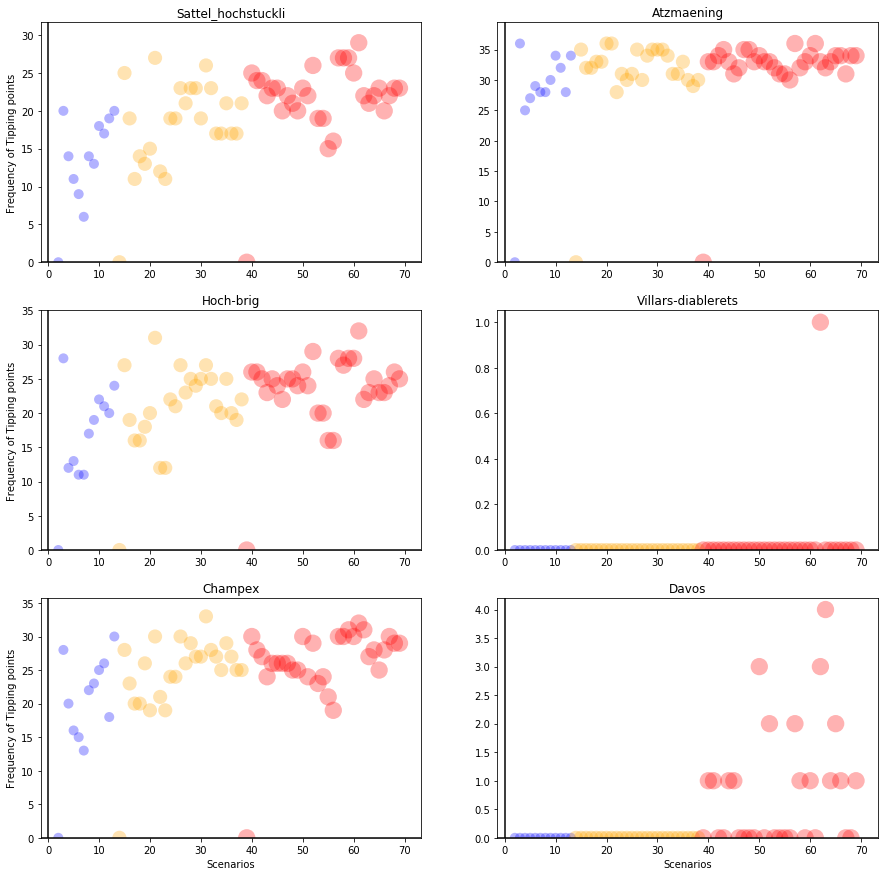

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15,15))
#fig, ax = plt.subplots()


axs[0,0].scatter(x_axis[1:13],T1RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[0,0].scatter(x_axis[13:38],T1RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[0,0].scatter(x_axis[38:69],T1RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[0,1].scatter(x_axis[1:13],T2RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[0,1].scatter(x_axis[13:38],T2RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[0,1].scatter(x_axis[38:69],T2RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[1,0].scatter(x_axis[1:13],T3RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[1,0].scatter(x_axis[13:38],T3RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[1,0].scatter(x_axis[38:69],T3RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[1,1].scatter(x_axis[1:13],T4RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[1,1].scatter(x_axis[13:38],T4RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[1,1].scatter(x_axis[38:69],T4RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[2,0].scatter(x_axis[1:13],T5RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[2,0].scatter(x_axis[13:38],T5RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[2,0].scatter(x_axis[38:69],T5RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[2,1].scatter(x_axis[1:13],T6RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[2,1].scatter(x_axis[13:38],T6RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[2,1].scatter(x_axis[38:69],T6RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


#axs[0,0].set_xlabel("Scenarios")
#axs[0,1].set_xlabel("Scenarios")
#axs[1,0].set_xlabel("Scenarios")
#axs[1,1].set_xlabel("Scenarios")
axs[2,0].set_xlabel("Scenarios")
axs[2,1].set_xlabel("Scenarios")


axs[0,0].set_ylabel("Frequency of Tipping points")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Frequency of Tipping points")
#axs[1,1].set_ylabel("Frequency of Tipping points")
axs[2,0].set_ylabel("Frequency of Tipping points")
#axs[2,1].set_ylabel("Frequency of Tipping points")

axs[0,0].set_title('Sattel_hochstuckli')
axs[0,1].set_title('Atzmaening')
axs[1,0].set_title('Hoch-brig')
axs[1,1].set_title('Villars-diablerets')
axs[2,0].set_title('Champex')
axs[2,1].set_title('Davos')



#axs[0,0].set_legend(loc='lower right', ncol=3)

axs[0,0].axhline(y=0, color='k')
axs[0,0].axvline(x=0, color='k')
axs[0,0].set_ylim(bottom=0)

axs[0,1].axhline(y=0, color='k')
axs[0,1].axvline(x=0, color='k')
axs[0,1].set_ylim(bottom=0)


axs[1,0].axhline(y=0, color='k')
axs[1,0].axvline(x=0, color='k')
axs[1,0].set_ylim(bottom=0)

axs[1,1].axhline(y=0, color='k')
axs[1,1].axvline(x=0, color='k')
axs[1,1].set_ylim(bottom=0)

axs[2,0].axhline(y=0, color='k')
axs[2,0].axvline(x=0, color='k')
axs[2,0].set_ylim(bottom=0)

axs[2,1].axhline(y=0, color='k')
axs[2,1].axvline(x=0, color='k')
axs[2,1].set_ylim(bottom=0)


plt.show()